# Import libraries

In [21]:
import os
import PIL as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Reading Dataset

In [2]:
# reading train dataset 
train_dir='/kaggle/input/brain-tumor-classification-mri/Training'
filepath=[]
labels=[]
folds=os.listdir(train_dir)
for fold in folds:
    filpath=os.path.join(train_dir,fold)
    filelist=os.listdir(filpath)
    for f in filelist:
        fpath=os.path.join(filpath,f)
        filepath.append(fpath)
        labels.append(fold)
f_series=pd.Series(filepath,name='filepath') 
l_series=pd.Series(labels,name='labels')
train_df=pd.concat([f_series,l_series],axis=1)

In [3]:
train_df.head()

,filepath,labels
0,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor


In [11]:
# Reading test dataset 
test_dir='/kaggle/input/brain-tumor-classification-mri/Testing'
filepath=[]
labels=[]
folds=os.listdir(test_dir)
for fold in folds:
    filpath=os.path.join(test_dir,fold)
    filelist=os.listdir(filpath)
    for f in filelist:
        fpath=os.path.join(filpath,f)
        filepath.append(fpath)
        labels.append(fold)
f_series=pd.Series(filepath,name='filepath') 
l_series=pd.Series(labels,name='labels')
test_df=pd.concat([f_series,l_series],axis=1)

In [12]:
test_df

,filepath,labels
0,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
1,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
2,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
3,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
4,/kaggle/input/brain-tumor-classification-mri/T...,no_tumor
...,...,...
389,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
390,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
391,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor
392,/kaggle/input/brain-tumor-classification-mri/T...,glioma_tumor


In [12]:
train_df.shape

(2870, 2)

# preprocessing

In [7]:
count_train=train_df["labels"].value_counts()
count_train

labels
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
Name: count, dtype: int64

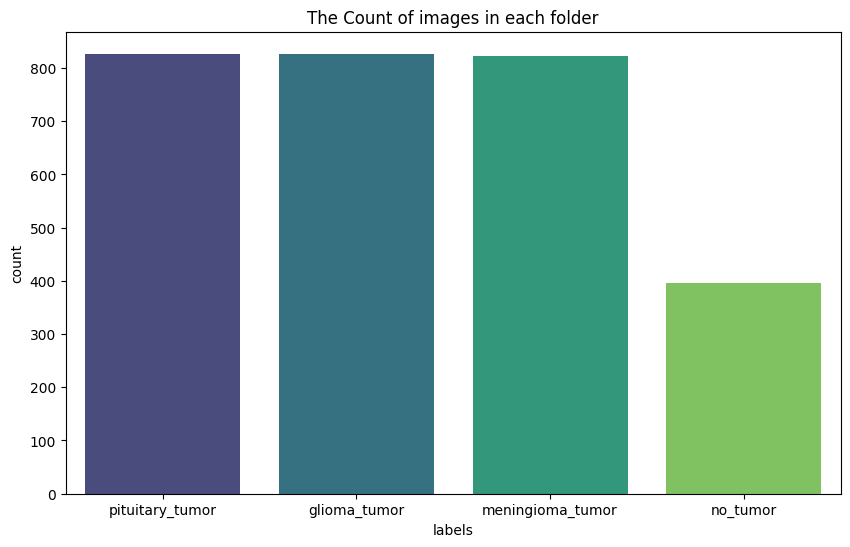

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=count_train.index,y=count_train.values,palette='viridis')
plt.title('The Count of images in each folder')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

In [63]:
count_test=test_df["labels"].value_counts()
count_test

labels
meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: count, dtype: int64

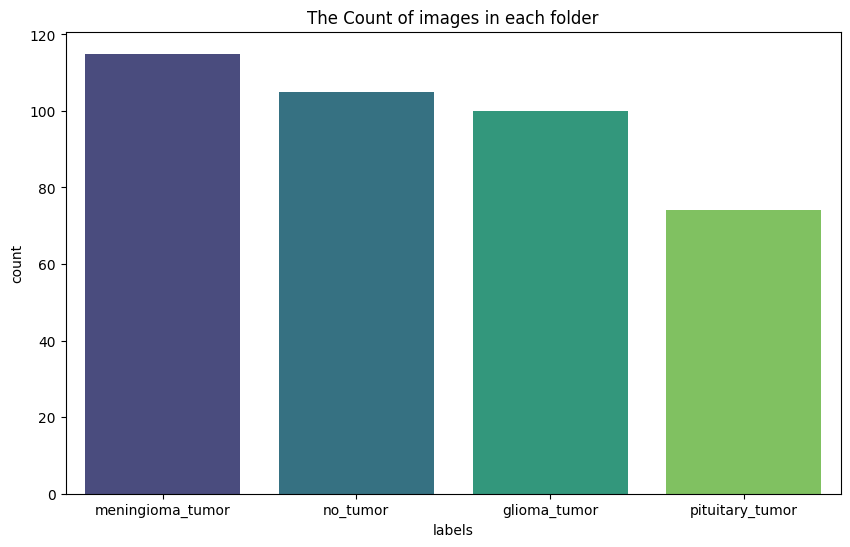

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x=count_test.index,y=count_test.values,palette='viridis')
plt.title('The Count of images in each folder')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()


In [13]:
# split train dataset into train and validation
train_df,valid_df=train_test_split(train_df,test_size=0.2,random_state=42,stratify=train_df['labels'])

In [14]:
print(train_df.shape)
print(valid_df.shape)

(1468, 2)
(368, 2)


# Data Augmentation

In [15]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepath', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 1468 validated image filenames belonging to 4 classes.
Found 368 validated image filenames belonging to 4 classes.
Found 394 validated image filenames belonging to 4 classes.


# Sample from Data 

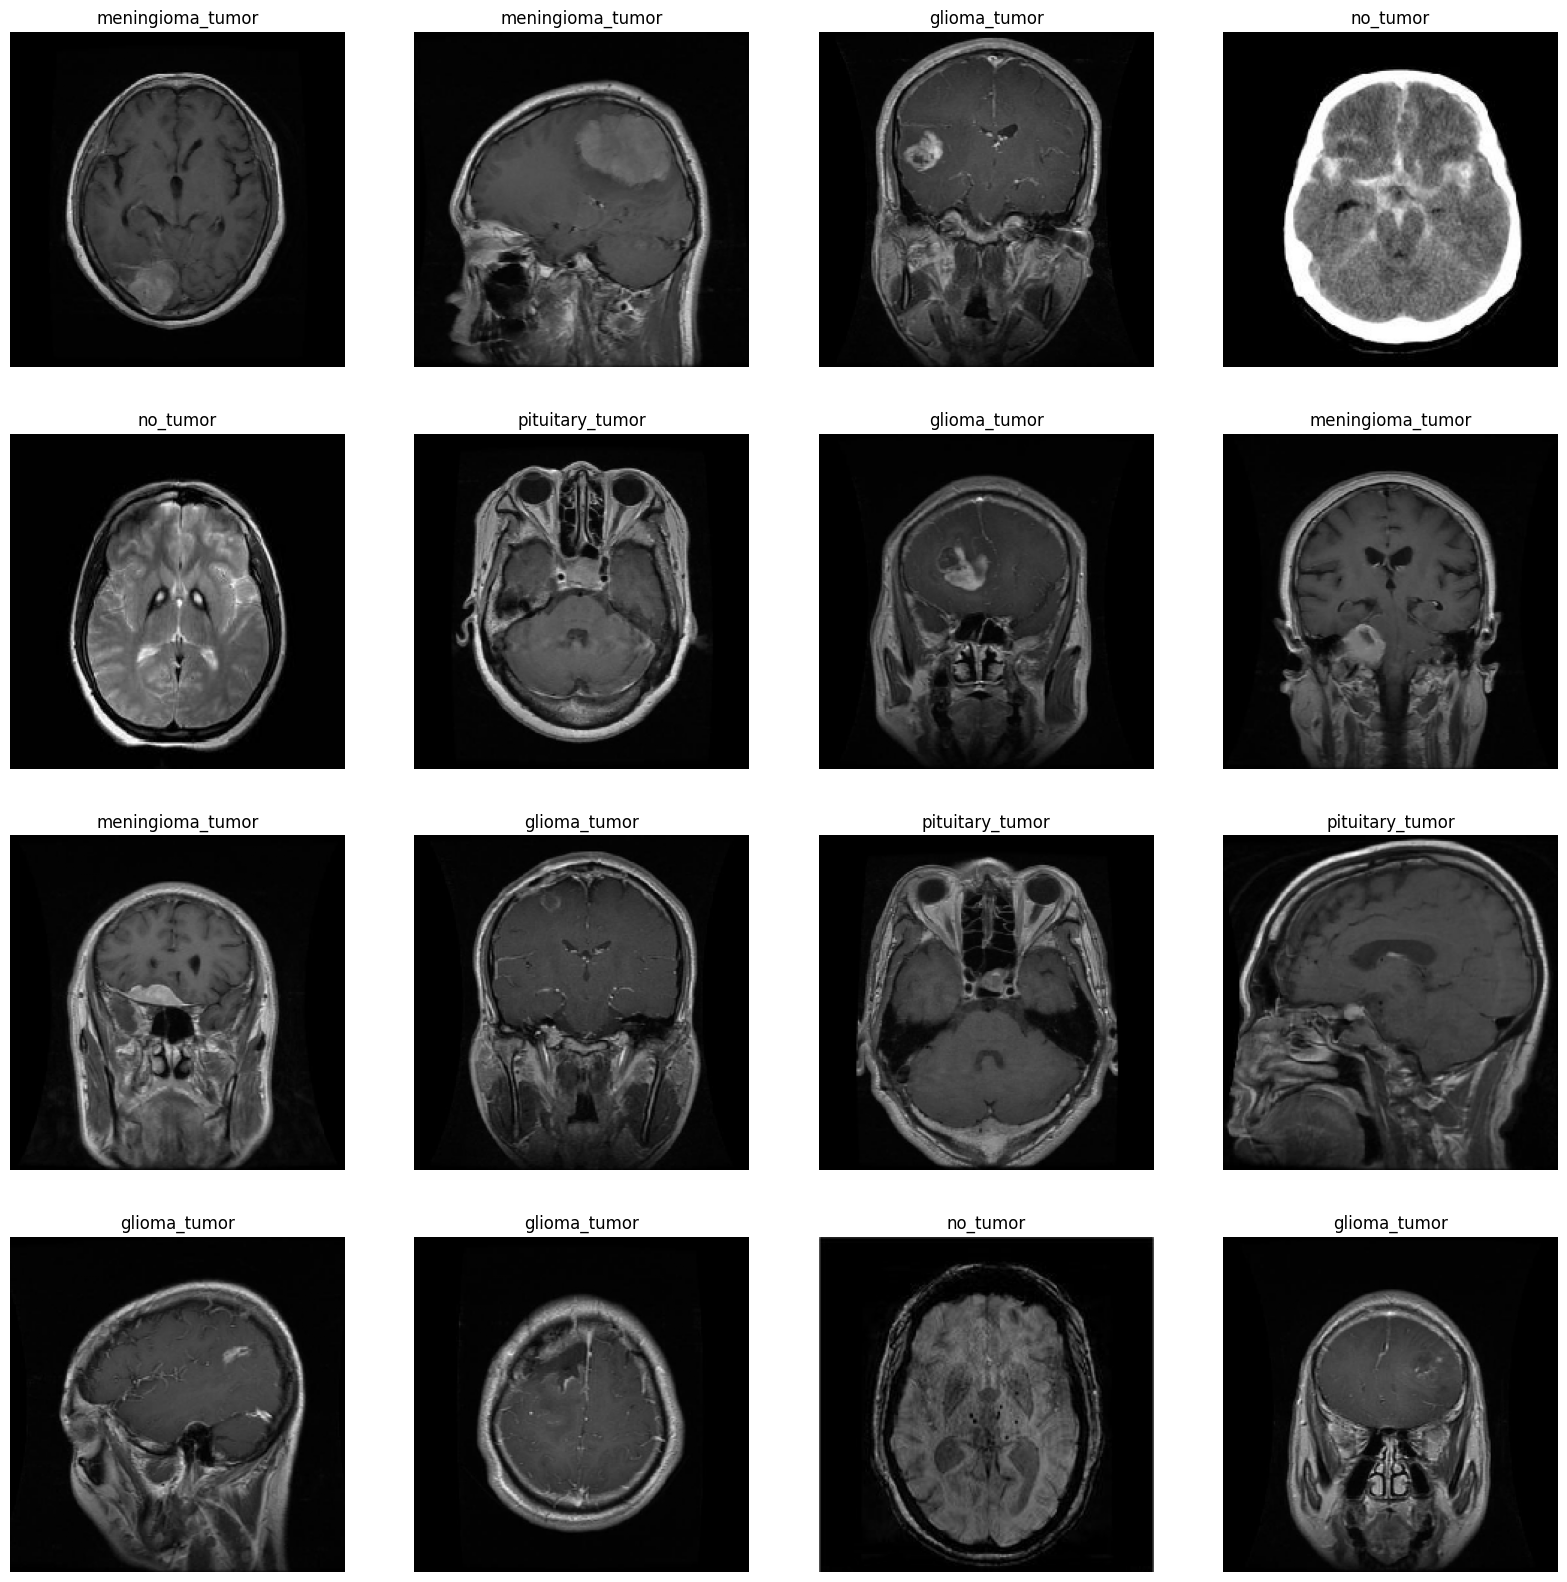

In [16]:
g_dict = train_gen.class_indices    
classes = list(g_dict.keys())      
images, labels = next(train_gen)     

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()


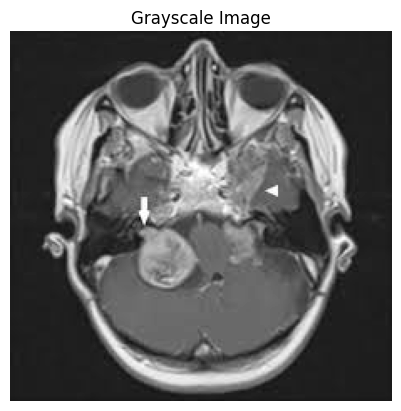

In [69]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(100).jpg')  
grayscale_image = image.convert('L')

plt.imshow(grayscale_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  
plt.show()


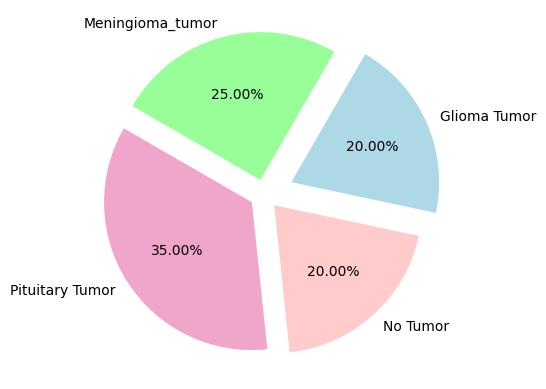

In [70]:
import matplotlib.pyplot as plt


labels = ['Meningioma_tumor', 'Pituitary Tumor', 'No Tumor', 'Glioma Tumor']
sizes = [25, 35, 20, 20]  
explode = [0.1, 0.1, 0.1, 0.2]  
colors = ['#98ff98', '#f0a6ca', '#ffcccb', '#add8e6']
plt.pie(
    sizes,
    startangle=60,
    explode=explode,
    autopct='%0.2f%%',
    labels=labels,
    radius=1,
    colors=colors
)


plt.show()


In [71]:
def plot_image_size_distribution(train_data):
    heights = []
    widths = []

    for img in train_data['image']:
        if len(img.shape) == 3:  
            height, width, _ = img.shape
        else:  
            height, width = img.shape
        heights.append(height)
        widths.append(width)
    
    if len(set(widths)) > 1 and len(set(heights)) > 1:
        plt.figure(figsize=(10, 6))
        plt.scatter(widths, heights, alpha=0.5)
        plt.title('Image Size Distribution')
        plt.xlabel('Width')
        plt.ylabel('Height')
        plt.show()
    else:
        print("All the images have similar dimensions, and there are no significant differences in sizes.")
        
plot_image_size_distribution(train_data)


All the images have similar dimensions, and there are no significant differences in sizes.


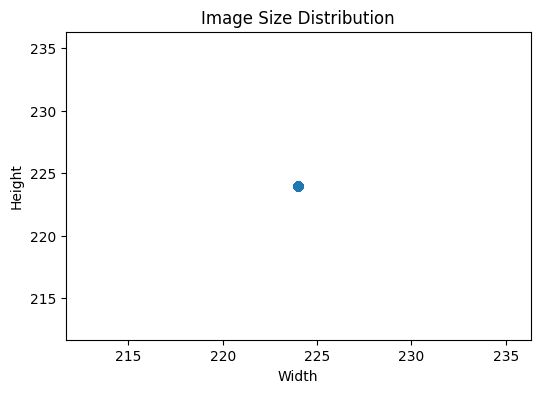

In [72]:
def plot_image_size_distribution(train_data):
    heights = []
    widths = []

    for img in train_data['image']:
        if len(img.shape) == 3:  
            height, width, _ = img.shape
        else:  
            height, width = img.shape
        heights.append(height)
        widths.append(width)
    
    plt.figure(figsize=(6,4))
    plt.scatter(widths, heights, alpha=0.5)
    plt.title('Image Size Distribution')
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.show()

plot_image_size_distribution(train_data)


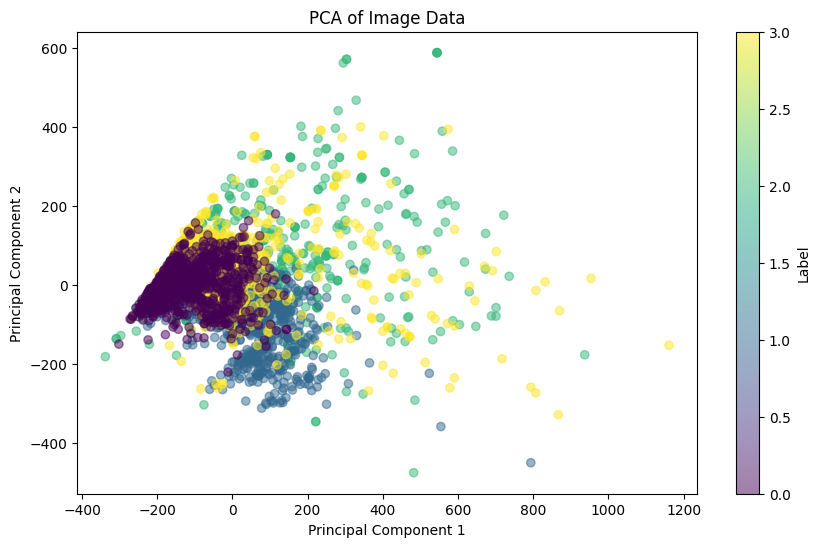

In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

def flatten_images(train_data):
    return np.array([img.flatten() for img in train_data['image']])

def plot_pca(train_data):
    images = flatten_images(train_data)
    scaler = StandardScaler()
    scaled_images = scaler.fit_transform(images)
    
    label_encoder = LabelEncoder()
    numeric_labels = label_encoder.fit_transform(train_data['label'])
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_images)
    
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        pca_result[:, 0], 
        pca_result[:, 1], 
        c=numeric_labels, 
        cmap='viridis', 
        alpha=0.5
    )
    plt.title('PCA of Image Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter, label='Label')
    plt.show()

plot_pca(train_data)


# Model Building

In [23]:
base_model=keras.applications.EfficientNetB3(include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [24]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,shuffle=False)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733418154.883040      75 service.cc:145] XLA service 0x7af9b80274d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733418154.883103      75 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733418154.883106      75 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1733418238.431000      75 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.6409 - loss: 0.9297 - val_accuracy: 0.6304 - val_loss: 0.9249
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step - accuracy: 0.9165 - loss: 0.2450 - val_accuracy: 0.7011 - val_loss: 0.7235
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.9511 - loss: 0.1515 - val_accuracy: 0.7120 - val_loss: 0.7594
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - accuracy: 0.9692 - loss: 0.1041 - val_accuracy: 0.7527 - val_loss: 0.6378
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 154ms/step - accuracy: 0.9789 - loss: 0.0632 - val_accuracy: 0.8207 - val_loss: 0.5109
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 153ms/step - accuracy: 0.9914 - loss: 0.0408 - val_accuracy: 0.8750 - val_loss: 0.3584
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.9841 - loss: 0.0414 - val_accuracy: 0.9130 - val_loss: 0.2964
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - accuracy: 0.9804 - loss: 0.0407 - val_accuracy: 0.9049 

# Evaluation

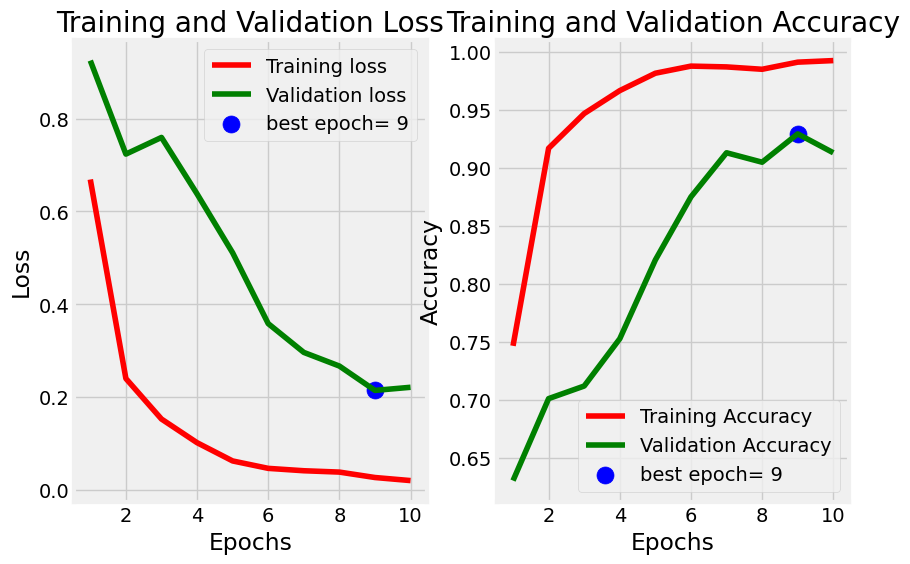

In [25]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

plt.figure(figsize= (10,6))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()


In [27]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 307ms/step


Text(49.583333333333314, 0.5, 'Actual Label\n')

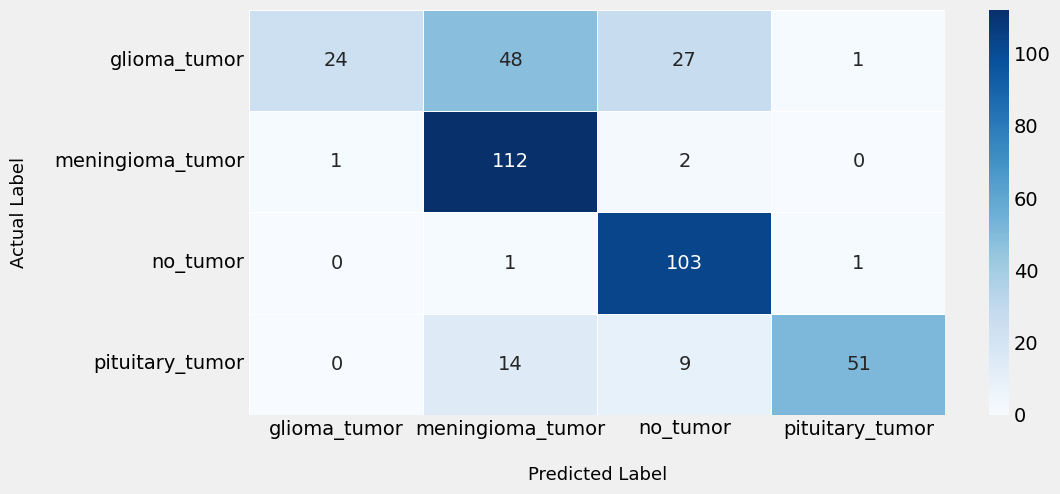

In [28]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13)

In [29]:
model.save('brain_tumor_classification.h5')


In [31]:
from IPython.display import FileLink
FileLink('brain_tumor_classification.h5')

/kaggle/working/brain_tumor_classification.h5